### 1.ANALYSE DE DONNÉES 

1.Chargement des Données

In [1]:
#Chargeons les données
data<-read.csv("housing_data.csv")

#Inspectons les premiris lignes
head(data)


,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,NA,5.585324,10,3,47.90077
2,2.654339,5.395206,3,6,41.53910
3,4.619221,6.033965,9,4,48.51757
4,6.807575,5.418335,10,5,42.50757
5,2.414617,6.189320,2,4,51.39125
6,2.414658,5.964833,6,4,49.64657


In [2]:
tail(data)

,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
,<dbl>,<dbl>,<int>,<int>,<dbl>
501,5.315444,6.626635,9,4,51.99554
502,NA,6.444620,4,6,53.57924
503,0.100000,6.734687,4,3,49.65183
504,4.407423,5.625335,2,1,43.67766
505,1.373394,6.922176,6,3,50.66238
506,1.782187,6.138320,2,4,45.43800


In [3]:
#Vérifier la structure des données 
print(str(data))


'data.frame':	506 obs. of  5 variables:
 $ Crime.Rate             : num  NA 2.65 4.62 6.81 2.41 ...
 $ Average.Rooms          : num  5.59 5.4 6.03 5.42 6.19 ...
 $ Public.Transport.Access: int  10 3 9 10 2 6 7 9 3 10 ...
 $ Number.of.Schools      : int  3 6 4 5 4 4 4 4 6 4 ...
 $ Median.Home.Value      : num  47.9 41.5 48.5 42.5 51.4 ...
NULL


In [4]:
#Résumé des données  statistiques
print(summary(data))

   Crime.Rate        Average.Rooms   Public.Transport.Access Number.of.Schools
 Min.   : 0.005305   Min.   :4.112   Min.   : 1.000          Min.   : 0.000   
 1st Qu.: 1.299938   1st Qu.:5.598   1st Qu.: 3.000          1st Qu.: 4.000   
 Median : 3.031481   Median :6.033   Median : 5.000          Median : 5.000   
 Mean   : 3.137415   Mean   :6.026   Mean   : 5.421          Mean   : 4.992   
 3rd Qu.: 4.584798   3rd Qu.:6.460   3rd Qu.: 8.000          3rd Qu.: 6.000   
 Max.   :12.631829   Max.   :7.801   Max.   :10.000          Max.   :10.000   
 NA's   :25          NA's   :15                                               
 Median.Home.Value
 Min.   :31.55    
 1st Qu.:43.23    
 Median :46.91    
 Mean   :47.10    
 3rd Qu.:50.85    
 Max.   :62.56    
                  


In [10]:
# Créons une fonction pour calculer le mode
mode_function <- function(v) {
    uniq <- unique(v)
    uniq[which.max(tabulate(match(v, uniq)))]
}

# Calculer la moyenne, le mode, la médiane et l'écart type pour chaque variable
means <- sapply(data, mean, na.rm = TRUE)  # Calculer les moyennes
modes <- sapply(data, mode_function)  # Corriger l'appel de la fonction de mode
medians <- sapply(data, median, na.rm = TRUE)  # Calculer les médianes
sds <- sapply(data, sd, na.rm = TRUE)  # Calculer les écarts types avec na.rm

# Créer un tableau avec les résultats
resultats <- data.frame(Variable = names(data), 
                        Mean = means, 
                        Mode = modes, 
                        Median = medians, 
                        SDT = sds)

# Afficher les résultats
print(resultats)

                                       Variable      Mean     Mode    Median
Crime.Rate                           Crime.Rate  3.137415  0.10000  3.031481
Average.Rooms                     Average.Rooms  6.025737       NA  6.033179
Public.Transport.Access Public.Transport.Access  5.420949  2.00000  5.000000
Number.of.Schools             Number.of.Schools  4.992095  5.00000  5.000000
Median.Home.Value             Median.Home.Value 47.103558 47.90077 46.912574
                              SDT
Crime.Rate              2.2255712
Average.Rooms           0.6753014
Public.Transport.Access 2.8588366
Number.of.Schools       1.9780821
Median.Home.Value       5.4893623


In [ ]:
# Calculer la matrice de corrélation entre chaque paire de variables
correlation_matrix <- cor(data, use = "complete.obs")
print(correlation_matrix)

# Trouver la valeur maximale de corrélation en excluant les corrélations parfaites
max_correlation <- max(correlation_matrix[correlation_matrix < 1])
print(max_correlation)

                        Crime.Rate Average.Rooms Public.Transport.Access
Crime.Rate              1.00000000   0.109411375             0.014246404
Average.Rooms           0.10941138   1.000000000            -0.003768297
Public.Transport.Access 0.01424640  -0.003768297             1.000000000
Number.of.Schools       0.02442190   0.005000546             0.035876982
Median.Home.Value       0.09161033   0.888351070             0.010709022
                        Number.of.Schools Median.Home.Value
Crime.Rate                    0.024421905       0.091610332
Average.Rooms                 0.005000546       0.888351070
Public.Transport.Access       0.035876982       0.010709022
Number.of.Schools             1.000000000       0.004667281
Median.Home.Value             0.004667281       1.000000000
[1] 0.8883511


Warning message:
"package 'corrplot' was built under R version 4.4.2"
corrplot 0.95 loaded



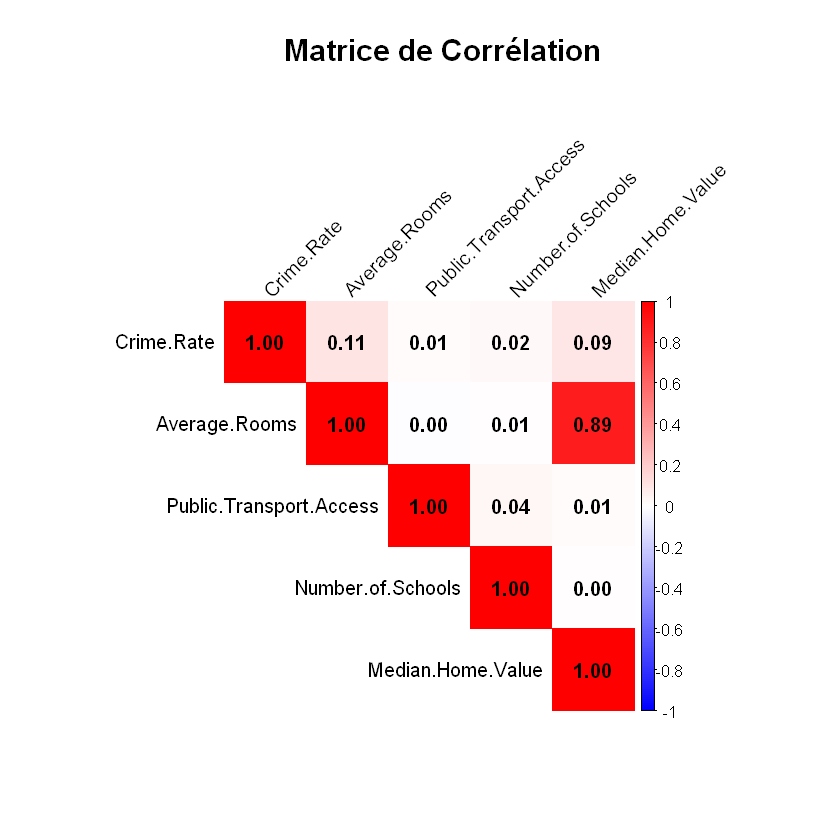

In [11]:
# Chargeons le package
library(corrplot)

# Calculons de la matrice de corrélation
cor_matrix <- cor(data, use = "complete.obs")

# Afficheons de la matrice de corrélation
corrplot(cor_matrix, method = "color", 
         col = colorRampPalette(c("blue", "white", "red"))(200), 
         type = "upper", 
         tl.col = "black", 
         tl.srt = 45, 
         addCoef.col = "black", 
         mar = c(0, 0, 1, 0)) # Ajustement des marges

# Ajoutons d'un titre
title(main = "Matrice de Corrélation", cex.main = 1.5) # Taille du titre

[1] "Valeurs manquantes par colonne :"
   Crime.Rate Average.Rooms 
           25            15 


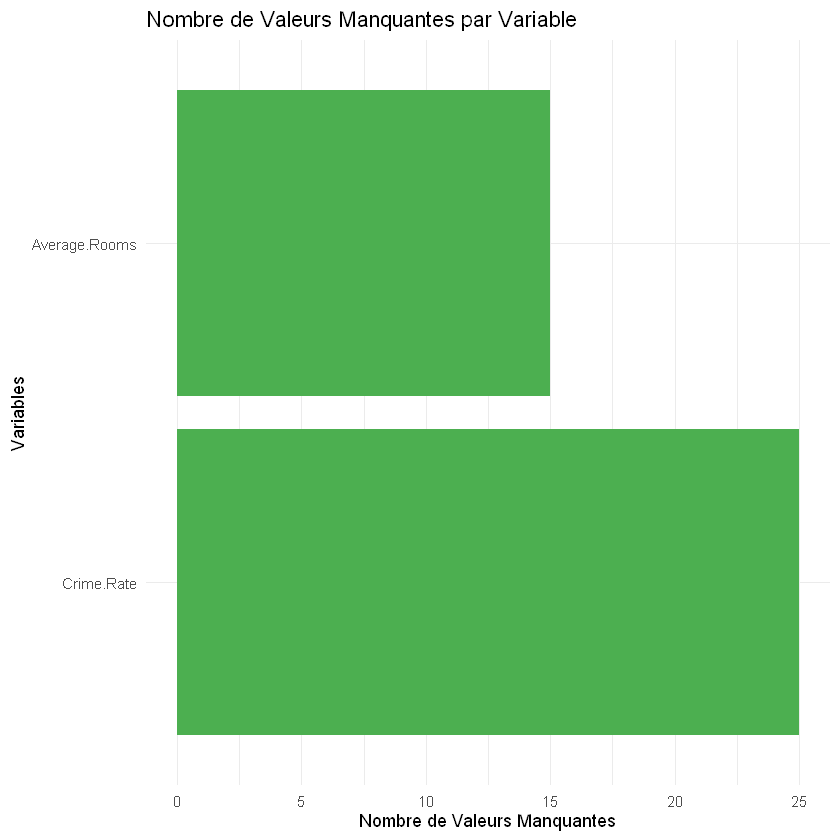

In [12]:
# Vérifier les valeurs manquantes
# Installer les bibliothèques si nécessaire
# install.packages("dplyr")
# install.packages("ggplot2")
# install.packages("visdat")
# install.packages("tidyr")
# install.packages("naniar")

suppressWarnings({
  # Charger les packages nécessaires
  library(dplyr)
  library(ggplot2)
  library(visdat)
  library(tidyr)
  library(naniar)
})

# Vérifions les valeurs manquantes
missing_values <- colSums(is.na(data))

# Affichons les valeurs manquantes
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Créons un data frame pour les valeurs manquantes
missing_df <- data.frame(Variable = names(missing_values[missing_values > 0]),
                          Missing_Count = missing_values[missing_values > 0])

# Diagramme en barres des valeurs manquantes
ggplot(missing_df, aes(x = reorder(Variable, -Missing_Count), y = Missing_Count)) +
  geom_bar(stat = "identity", fill = "#4CAF50") +
  coord_flip() +  # Pour faire une orientation horizontale
  theme_minimal() +
  labs(title = "Nombre de Valeurs Manquantes par Variable",
       x = "Variables",
       y = "Nombre de Valeurs Manquantes")

In [13]:
significant_correlations <- cor_matrix[abs(cor_matrix) > 0.5]
print(significant_correlations)

[1] 1.0000000 1.0000000 0.8883511 1.0000000 1.0000000 0.8883511 1.0000000


In [14]:
#Imputation des valeurs manquantes avec la médiane 

data <- data %>%
  mutate(across(everything(), ~ifelse(is.na(.), median(., na.rm = TRUE), .)))



In [15]:
# Vérifions à nouveau les valeurs manquantes après imputation
missing_values_after <- colSums(is.na(data))

# Affichons les valeurs manquantes après imputation
print("Valeurs manquantes par colonne après imputation :")
print(missing_values_after[missing_values_after > 0])

# Optionnel : Vérification rapide
if (all(missing_values_after == 0)) {
  print("Il n'y a plus de valeurs manquantes dans le dataset.")
} else {
  print("Il y a encore des valeurs manquantes.")
}

[1] "Valeurs manquantes par colonne après imputation :"
named numeric(0)
[1] "Il n'y a plus de valeurs manquantes dans le dataset."


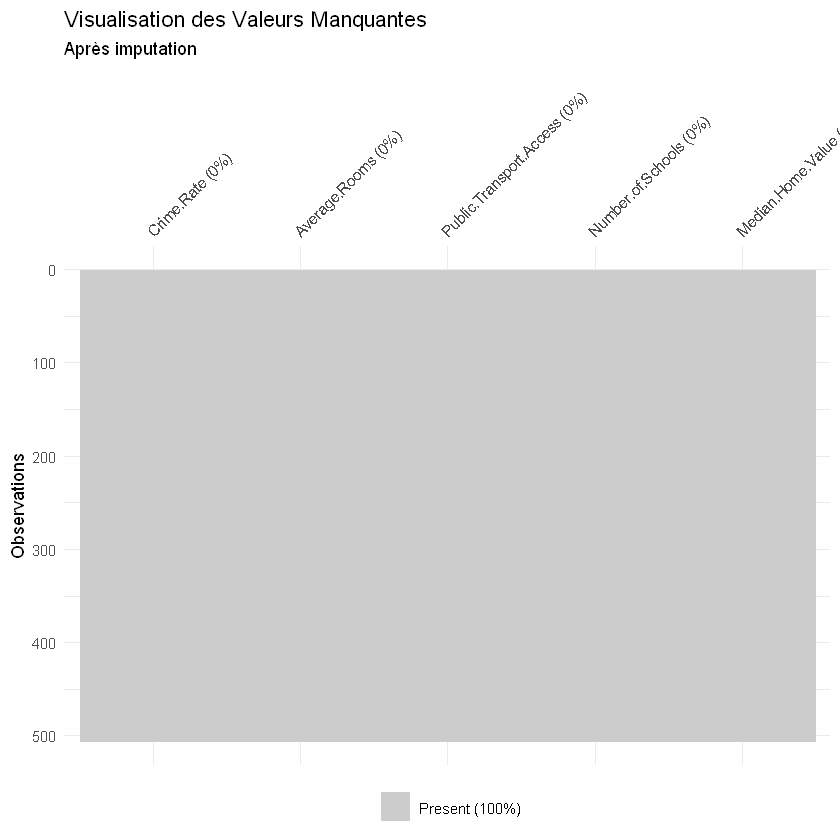

In [16]:
#Visualisons les valeurs manquantes
library(naniar)


#Visualisation avec vis_miss sans scale_fill_manual
vis_miss(data) +
  labs(title = "Visualisation des Valeurs Manquantes",
       subtitle = "Après imputation") +
  theme(legend.position = "bottom")  #position legende



6. Gestion des Données aberrants 

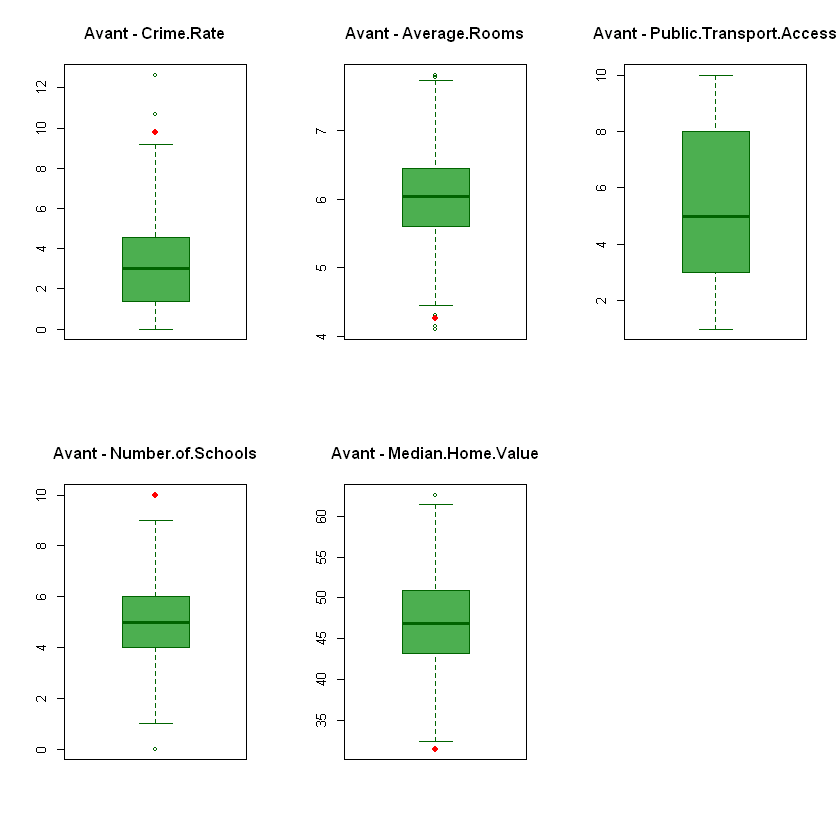

In [17]:
# Données aberrantes

# Visualisation avant remplacement des valeurs aberrantes avec couleurs personnalisées
par(mfrow = c(2, 3))  # Diviser la fenêtre en 2 lignes et 3 colonnes

# Boucle à travers les colonnes de données
for (col in names(data)) {
  # Vérifier si la colonne est numérique
  if (is.numeric(data[[col]])) {
    boxplot(data[[col]], 
            main = paste("Avant -", col), 
            ylim = range(data[[col]], na.rm = TRUE), 
            col = "#4CAF50",  # Couleur de la boîte
            border = "darkgreen",  # Couleur des bordures
            outline = TRUE)  # Afficher les valeurs aberrantes
    
    # Calculer les valeurs aberrantes
    outliers <- data[[col]][data[[col]] < (quantile(data[[col]], 0.25, na.rm = TRUE) - 1.5 * IQR(data[[col]], na.rm = TRUE)) | 
                                    data[[col]] > (quantile(data[[col]], 0.75, na.rm = TRUE) + 1.5 * IQR(data[[col]], na.rm = TRUE))]
    
    # Ajouter les points rouges pour les valeurs aberrantes
    points(outliers, pch = 16, col = "red")  # Points rouges pour les valeurs aberrantes
  } else {
    # Optionnel : afficher un message pour les colonnes non numériques
    cat(paste("La colonne", col, "n'est pas numérique et a été ignorée.\n"))
  }
}

par(mfrow = c(1, 1))  # Revenir à un seul graphique par fenêtre

In [18]:
# Calculons le pourcentage de valeurs aberrantes pour chaque variable
for (col in names(data)) {
  # Calculer l'écart interquartile (IQR)
  iqr <- IQR(data[[col]], na.rm = TRUE)
  
  # Définissons les seuils pour les valeurs aberrantes
  lower_bound <- quantile(data[[col]], 0.25, na.rm = TRUE) - 1.5 * iqr
  upper_bound <- quantile(data[[col]], 0.75, na.rm = TRUE) + 1.5 * iqr
  
  # Identifions les valeurs aberrantes
  outliers <- data[[col]] < lower_bound | data[[col]] > upper_bound
  
  # Calculons le pourcentage de valeurs aberrantes
  outlier_pct <- round(100 * sum(outliers) / nrow(data), 2)
  
  # Affichons les résultats
  print(paste0("Pourcentage de valeurs aberrantes pour ", col, ": ", outlier_pct, "%"))
}

[1] "Pourcentage de valeurs aberrantes pour Crime.Rate: 0.59%"
[1] "Pourcentage de valeurs aberrantes pour Average.Rooms: 1.38%"
[1] "Pourcentage de valeurs aberrantes pour Public.Transport.Access: 0%"
[1] "Pourcentage de valeurs aberrantes pour Number.of.Schools: 2.57%"
[1] "Pourcentage de valeurs aberrantes pour Median.Home.Value: 0.4%"


In [20]:
# Remplacement des valeurs aberrantes
library(dplyr)

# Liste des colonnes à traiter
columns_to_replace <- c("Crime.Rate", 
                         "Average.Rooms", 
                         "Public.Transport.Access", 
                         "Number.of.Schools", 
                         "Median.Home.Value")

# Boucle à travers les colonnes spécifiées
for (col in columns_to_replace) {
  # Calculer l'écart interquartile (IQR)
  iqr <- IQR(data[[col]], na.rm = TRUE)
  
  # Définir les seuils pour les valeurs aberrantes
  lower_bound <- quantile(data[[col]], 0.25, na.rm = TRUE) - 1.5 * iqr
  upper_bound <- quantile(data[[col]], 0.75, na.rm = TRUE) + 1.5 * iqr
  
  # Compter les valeurs aberrantes avant le remplacement
  outlier_count <- sum(data[[col]] < lower_bound | data[[col]] > upper_bound, na.rm = TRUE)
  
  # Remplacer les valeurs aberrantes par la médiane
  median_value <- median(data[[col]], na.rm = TRUE)  # Calculer la médiane
  data[[col]][data[[col]] < lower_bound | data[[col]] > upper_bound] <- median_value
  
  # Afficher les résultats du remplacement
  cat(paste("Pour", col, ":", outlier_count, "valeurs aberrantes remplacées par la médiane", median_value, "\n"))
}

Pour Crime.Rate : 1 valeurs aberrantes remplacées par la médiane 3.031481002 
Pour Average.Rooms : 2 valeurs aberrantes remplacées par la médiane 6.03317907 
Pour Public.Transport.Access : 0 valeurs aberrantes remplacées par la médiane 5 
Pour Number.of.Schools : 0 valeurs aberrantes remplacées par la médiane 5 
Pour Median.Home.Value : 0 valeurs aberrantes remplacées par la médiane 46.91257421 


In [22]:
summary(data[c("Crime.Rate", "Average.Rooms", "Public.Transport.Access", "Number.of.Schools", "Median.Home.Value")])

   Crime.Rate       Average.Rooms   Public.Transport.Access Number.of.Schools
 Min.   :0.005305   Min.   :4.452   Min.   : 1.000          Min.   :1.000    
 1st Qu.:1.375937   1st Qu.:5.612   1st Qu.: 3.000          1st Qu.:4.000    
 Median :3.031481   Median :6.033   Median : 5.000          Median :5.000    
 Mean   :3.072573   Mean   :6.023   Mean   : 5.421          Mean   :4.982    
 3rd Qu.:4.469880   3rd Qu.:6.443   3rd Qu.: 8.000          3rd Qu.:6.000    
 Max.   :8.476139   Max.   :7.609   Max.   :10.000          Max.   :9.000    
 Median.Home.Value
 Min.   :32.42    
 1st Qu.:43.35    
 Median :46.91    
 Mean   :47.10    
 3rd Qu.:50.81    
 Max.   :61.35    

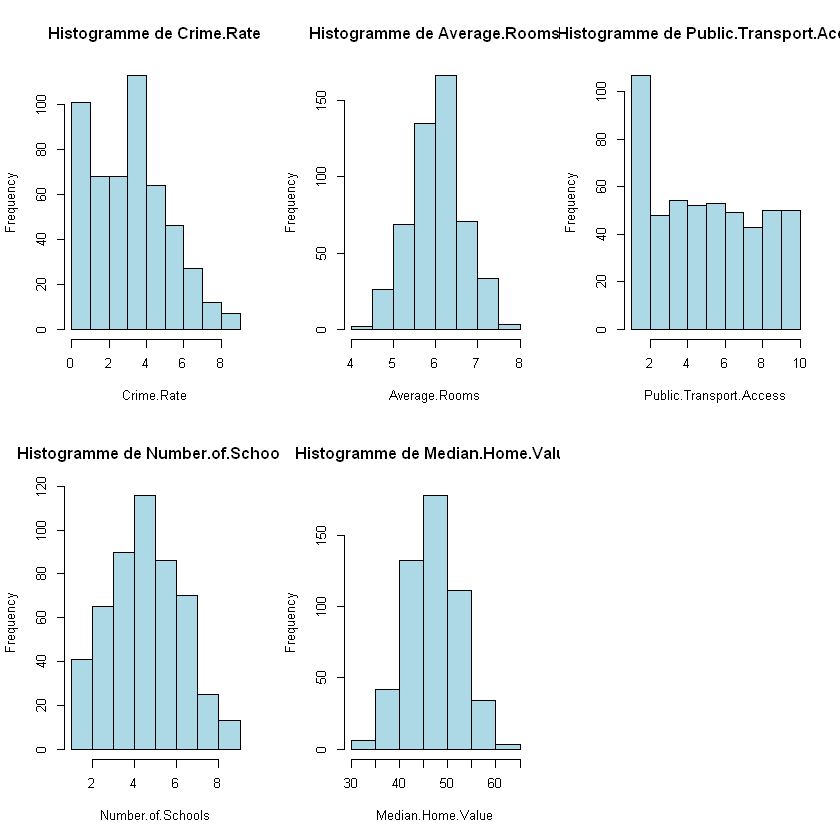

In [23]:
par(mfrow = c(2, 3))
for (col in c("Crime.Rate", "Average.Rooms", "Public.Transport.Access", "Number.of.Schools", "Median.Home.Value")) {
    hist(data[[col]], main = paste("Histogramme de", col), xlab = col, col = "lightblue", border = "black")
}
par(mfrow = c(1, 1))

In [24]:
cor_matrix <- cor(data[c("Crime.Rate", "Average.Rooms", "Public.Transport.Access", "Number.of.Schools", "Median.Home.Value")], use = "complete.obs")
print(cor_matrix)

                        Crime.Rate Average.Rooms Public.Transport.Access
Crime.Rate              1.00000000   0.072819310             0.019388857
Average.Rooms           0.07281931   1.000000000            -0.005086009
Public.Transport.Access 0.01938886  -0.005086009             1.000000000
Number.of.Schools       0.02875092  -0.012204462             0.001451390
Median.Home.Value       0.07849804   0.810995796            -0.007084937
                        Number.of.Schools Median.Home.Value
Crime.Rate                    0.028750925       0.078498041
Average.Rooms                -0.012204462       0.810995796
Public.Transport.Access       0.001451390      -0.007084937
Number.of.Schools             1.000000000      -0.002197294
Median.Home.Value            -0.002197294       1.000000000


In [25]:
# Vérifier à nouveau les valeurs aberrantes 
for (col in c("Crime.Rate", 
                     "Average.Rooms", 
                     "Public.Transport.Access", 
                     "Number.of.Schools", 
                     "Median.Home.Value")) {
  iqr <- IQR(data[[col]], na.rm = TRUE)
  lower_bound <- quantile(data[[col]], 0.25, na.rm = TRUE) - 1.5 * iqr
  upper_bound <- quantile(data[[col]], 0.75, na.rm = TRUE) + 1.5 * iqr
  
  # Identifier les valeurs aberrantes
  outliers <- data[[col]] < lower_bound | data[[col]] > upper_bound
  outlier_pct <- round(100 * sum(outliers) / nrow(data), 2)
  
  # Afficher le pourcentage de valeurs aberrantes
  print(paste0("Pourcentage de valeurs aberrantes pour ", col, ": ", outlier_pct, "%"))
}

[1] "Pourcentage de valeurs aberrantes pour Crime.Rate: 0%"
[1] "Pourcentage de valeurs aberrantes pour Average.Rooms: 0%"
[1] "Pourcentage de valeurs aberrantes pour Public.Transport.Access: 0%"
[1] "Pourcentage de valeurs aberrantes pour Number.of.Schools: 0%"
[1] "Pourcentage de valeurs aberrantes pour Median.Home.Value: 0%"


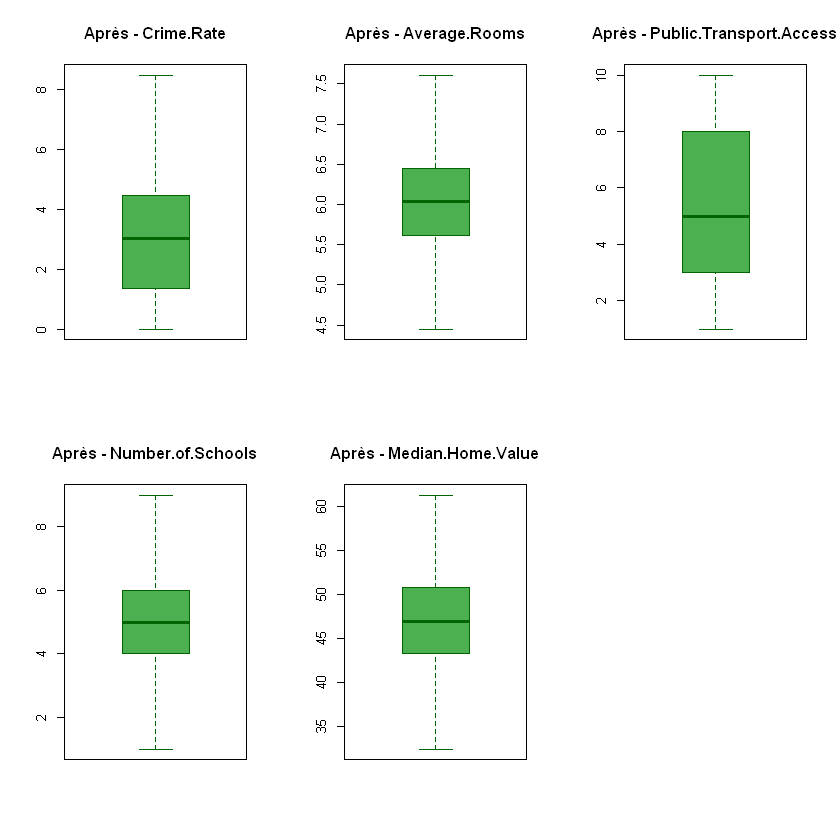

In [26]:
# Visualisation après remplacement des valeurs aberrantes avec couleurs personnalisées
par(mfrow = c(2, 3)) # Diviser la fenêtre en 2 lignes et 3 colonnes
for (col in names(data)) {
  boxplot(data[[col]], 
          main = paste("Après -", col), 
          ylim = range(data[[col]], na.rm = TRUE), 
          col = "#4CAF50", 
          border = "darkgreen", 
          outline = TRUE)
  
  points(data[[col]][data[[col]] < (quantile(data[[col]], 0.25, na.rm = TRUE) - 1.5 * IQR(data[[col]], na.rm = TRUE)) | 
                     data[[col]] > (quantile(data[[col]], 0.75, na.rm = TRUE) + 1.5 * IQR(data[[col]], na.rm = TRUE))], 
                     pch = 16, col = "red") # Points rouges pour les valeurs aberrantes
}
par(mfrow = c(1, 1)) # Revenir à un seul graphique par fenêtre

7. Gestion des doublons

In [27]:
# Vérifier s'il y a des doublons
duplicates <- data[duplicated(data) | duplicated(data, fromLast = TRUE), ]

# Afficher les doublons éventuels
if (nrow(duplicates) > 0) {
  print("Voici les doublons détectés :")
  print(duplicates)
} else {
  print("Il n'y a pas de doublons dans le jeu de données.")
}

[1] "Il n'y a pas de doublons dans le jeu de données."


### 2.Visualisation des Données

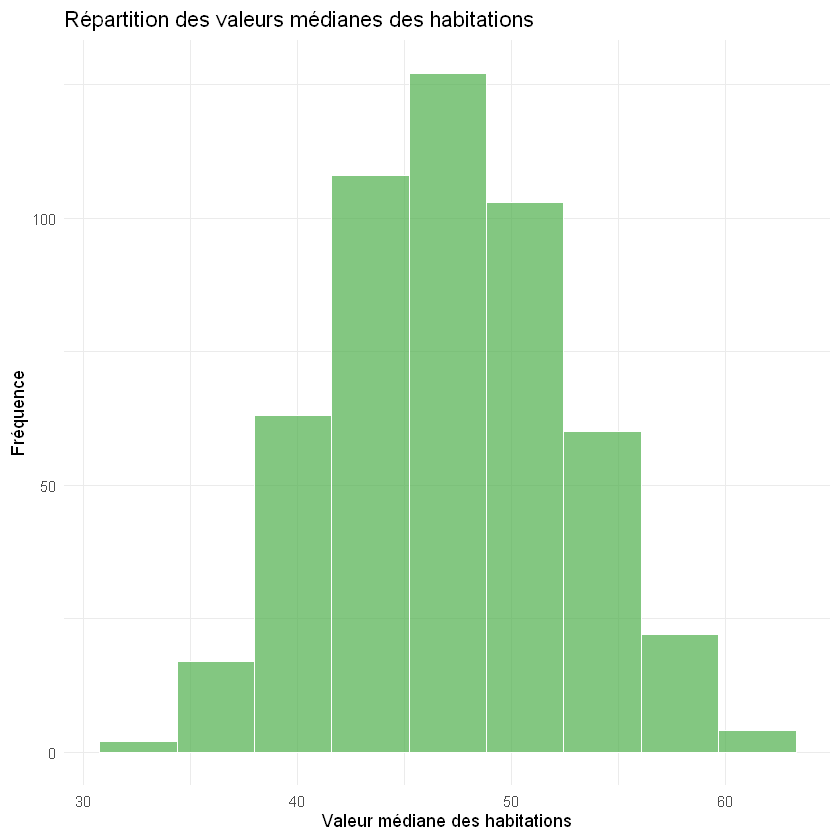

In [29]:
library(ggplot2)

# Définissons une couleur unique
my_color <- "#4daf4a"  # Choisissez une couleur de votre palette

# Créons l'histogramme 
ggplot(data, aes(x = Median.Home.Value)) +
  geom_histogram(bins = 9, fill = my_color, color = "white", alpha = 0.7) +
  labs(title = "Répartition des valeurs médianes des habitations",
       x = "Valeur médiane des habitations", 
       y = "Fréquence") +
  theme_minimal()

### 3.Test d'Hypothèse

1. Taux de criminalité "élevés" et "bas"

In [51]:
library(dplyr)   # Pour la manipulation des données
library(car)     # Pour le test de Levene

# 1. Définir les taux de criminalité "élevés" et "faibles" en fonction de la médiane de la variable Crime.Rate
median_crime_rate <- median(data$Crime.Rate, na.rm = TRUE)

data$Crime.Category <- ifelse(data$Crime.Rate > median_crime_rate, "Élevé", "Faible")

# Vérifier les valeurs uniques dans Crime.Category et les niveaux
unique(data$Crime.Category)  # Afficher les valeurs uniques
levels(data$Crime.Category)   # Afficher les niveaux

# Effectuer le test de Levene pour l'homogénéité des variances
levene_test <- leveneTest(Median.Home.Value ~ Crime.Category, data = data)

# Afficher le résultat du test
print(levene_test)

[1] "Faible" "Élevé"

NULL

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.9477 0.3308
      504               


2.Vérifier les hypothèses du test t

In [52]:
# Pour un test t, il est essentiel de vérifier la normalité et l'homogénéité des variances.

# Vérification de la normalité pour chaque groupe
test_normalite_eleve <- shapiro.test(data$Median.Home.Value[data$Crime.Category == "Élevé"])
test_normalite_faible <- shapiro.test(data$Median.Home.Value[data$Crime.Category == "Faible"])

# Afficher les résultats des tests de normalité pour chaque groupe
test_normalite_eleve
test_normalite_faible

# Afficher les p-values des tests de Shapiro-Wilk pour chaque groupe
print(paste("P-value du test de Shapiro pour le taux de criminalité élevé :", test_normalite_eleve$p.value))
print(paste("P-value du test de Shapiro pour le taux de criminalité faible :", test_normalite_faible$p.value))


	Shapiro-Wilk normality test

data:  data$Median.Home.Value[data$Crime.Category == "Élevé"]
W = 0.9938, p-value = 0.4389



	Shapiro-Wilk normality test

data:  data$Median.Home.Value[data$Crime.Category == "Faible"]
W = 0.99602, p-value = 0.7259


[1] "P-value du test de Shapiro pour le taux de criminalité élevé : 0.438853099998653"
[1] "P-value du test de Shapiro pour le taux de criminalité faible : 0.725916448814534"


3.Effectuer le test t


In [53]:
t_test_result <- t.test(Median.Home.Value ~ Crime.Category, data = data, var.equal = TRUE)
print(t_test_result)


	Two Sample t-test

data:  Median.Home.Value by Crime.Category
t = 1.0696, df = 504, p-value = 0.2853
alternative hypothesis: true difference in means between group Élevé and group Faible is not equal to 0
95 percent confidence interval:
 -0.4308084  1.4604428
sample estimates:
 mean in group Élevé mean in group Faible 
            47.37770             46.86289 



In [58]:
# Test t à deux échantillons
# Afficher les résultats du test
print(t_test_result)

# Définir le niveau de signification
alpha <- 0.05

# Calculer les degrés de liberté (n - 1, où n est la taille de l'échantillon)
df <- nrow(data) - 1  

# Pour un test bilatéral, nous divisons la valeur alpha par 2 pour la queue supérieure.
# Nous utilisons 1 - (alpha/2) car qt() donne la valeur pour la queue gauche par défaut,
# et en soustrayant de 1, nous obtenons la valeur pour la queue droite.
valeur_critique_t <- qt(1 - (alpha/2), df)

# Afficher la valeur critique t
print(paste("Valeur critique t à alpha =", alpha, ":", valeur_critique_t))


	Two Sample t-test

data:  Median.Home.Value by Crime.Category
t = 1.0696, df = 504, p-value = 0.2853
alternative hypothesis: true difference in means between group Élevé and group Faible is not equal to 0
95 percent confidence interval:
 -0.4308084  1.4604428
sample estimates:
 mean in group Élevé mean in group Faible 
            47.37770             46.86289 

[1] "Valeur critique t à alpha = 0.05 : 1.96467263873962"


In [56]:
critical_t <- qt(1 - (alpha/2), df)
print(critical_t)

[1] 1.964673


### 4.Modèle de Régression Linéaire

 1 : Créer le Modèle de Régression Linéaire

In [61]:
# Pour prédire la valeur médiane des maisons en utilisant la variable du nombre moyen de pièces
model <- lm(`Median.Home.Value` ~ `Average.Rooms`, data=data)
print(summary(model))



Call:
lm(formula = Median.Home.Value ~ Average.Rooms, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7504  -1.7855   0.0218   1.8208  14.1799 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.6573     1.3712   3.397 0.000736 ***
Average.Rooms   7.0469     0.2264  31.120  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.164 on 504 degrees of freedom
Multiple R-squared:  0.6577,	Adjusted R-squared:  0.657 
F-statistic: 968.5 on 1 and 504 DF,  p-value: < 2.2e-16



2 : Créer le Nuage de Points de Régression

`geom_smooth()` using formula = 'y ~ x'


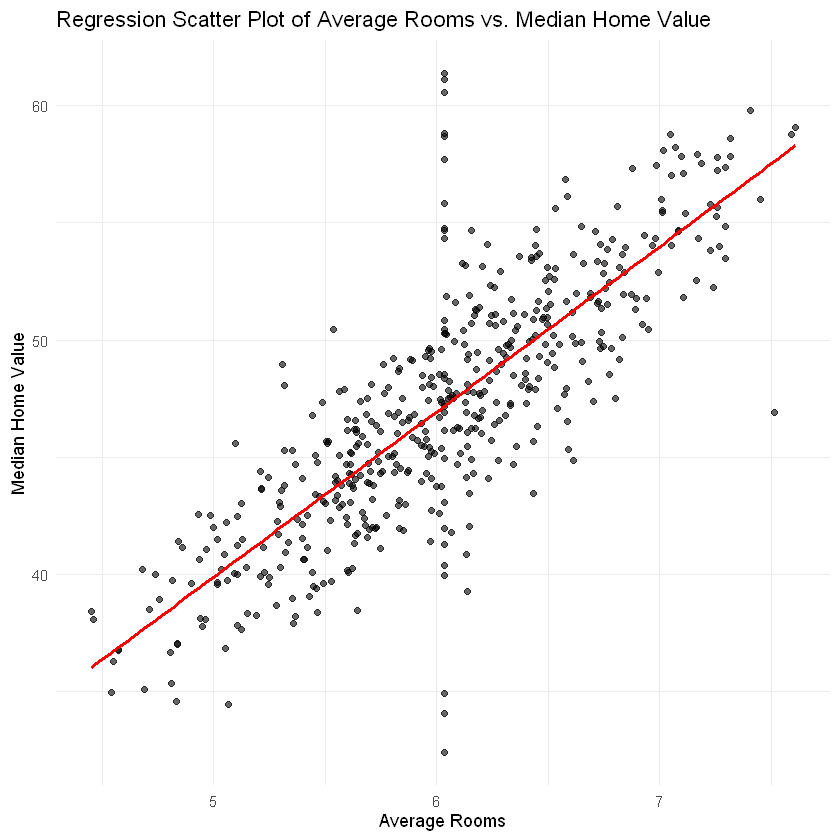

In [62]:
regression_scatter <- ggplot(data, aes(x=Average.Rooms, y=Median.Home.Value)) +
  geom_point( alpha=0.6) +  # Color points by Crime Rate for added depth
  geom_smooth(method="lm", col="red", se=FALSE) +  # Linear regression line without shaded region
  labs(title="Regression Scatter Plot of Average Rooms vs. Median Home Value",
       x="Average Rooms",
       y="Median Home Value") +
  theme_minimal()
regression_scatter